In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import qqplot

In [2]:
data=pd.read_csv('Walmart.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the entire DataFrame
data
#data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [3]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Date          143 non-null    object 
 2   Weekly_Sales  143 non-null    float64
 3   Holiday_Flag  143 non-null    int64  
 4   Temperature   143 non-null    float64
 5   Fuel_Price    143 non-null    float64
 6   CPI           143 non-null    float64
 7   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.0,1.555264e+06,0.069930,68.306783,3.219699,215.996892,7.610420
std,0.0,1.559808e+05,0.255926,14.250486,0.427313,4.350890,0.383749
min,1.0,1.316899e+06,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.0,1.458105e+06,0.000000,58.265000,2.764500,211.549277,7.348000
50%,1.0,1.534850e+06,0.000000,69.640000,3.290000,215.459905,7.787000
75%,1.0,1.614892e+06,0.000000,80.485000,3.594000,220.531330,7.838000
max,1.0,2.387950e+06,1.000000,91.650000,3.907000,223.444251,8.106000


In [5]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
# Convert 'Date' column to datetime format, with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Extract year and month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
#data
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
 8   Year          143 non-null    int64         
 9   Month         143 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 11.3 KB


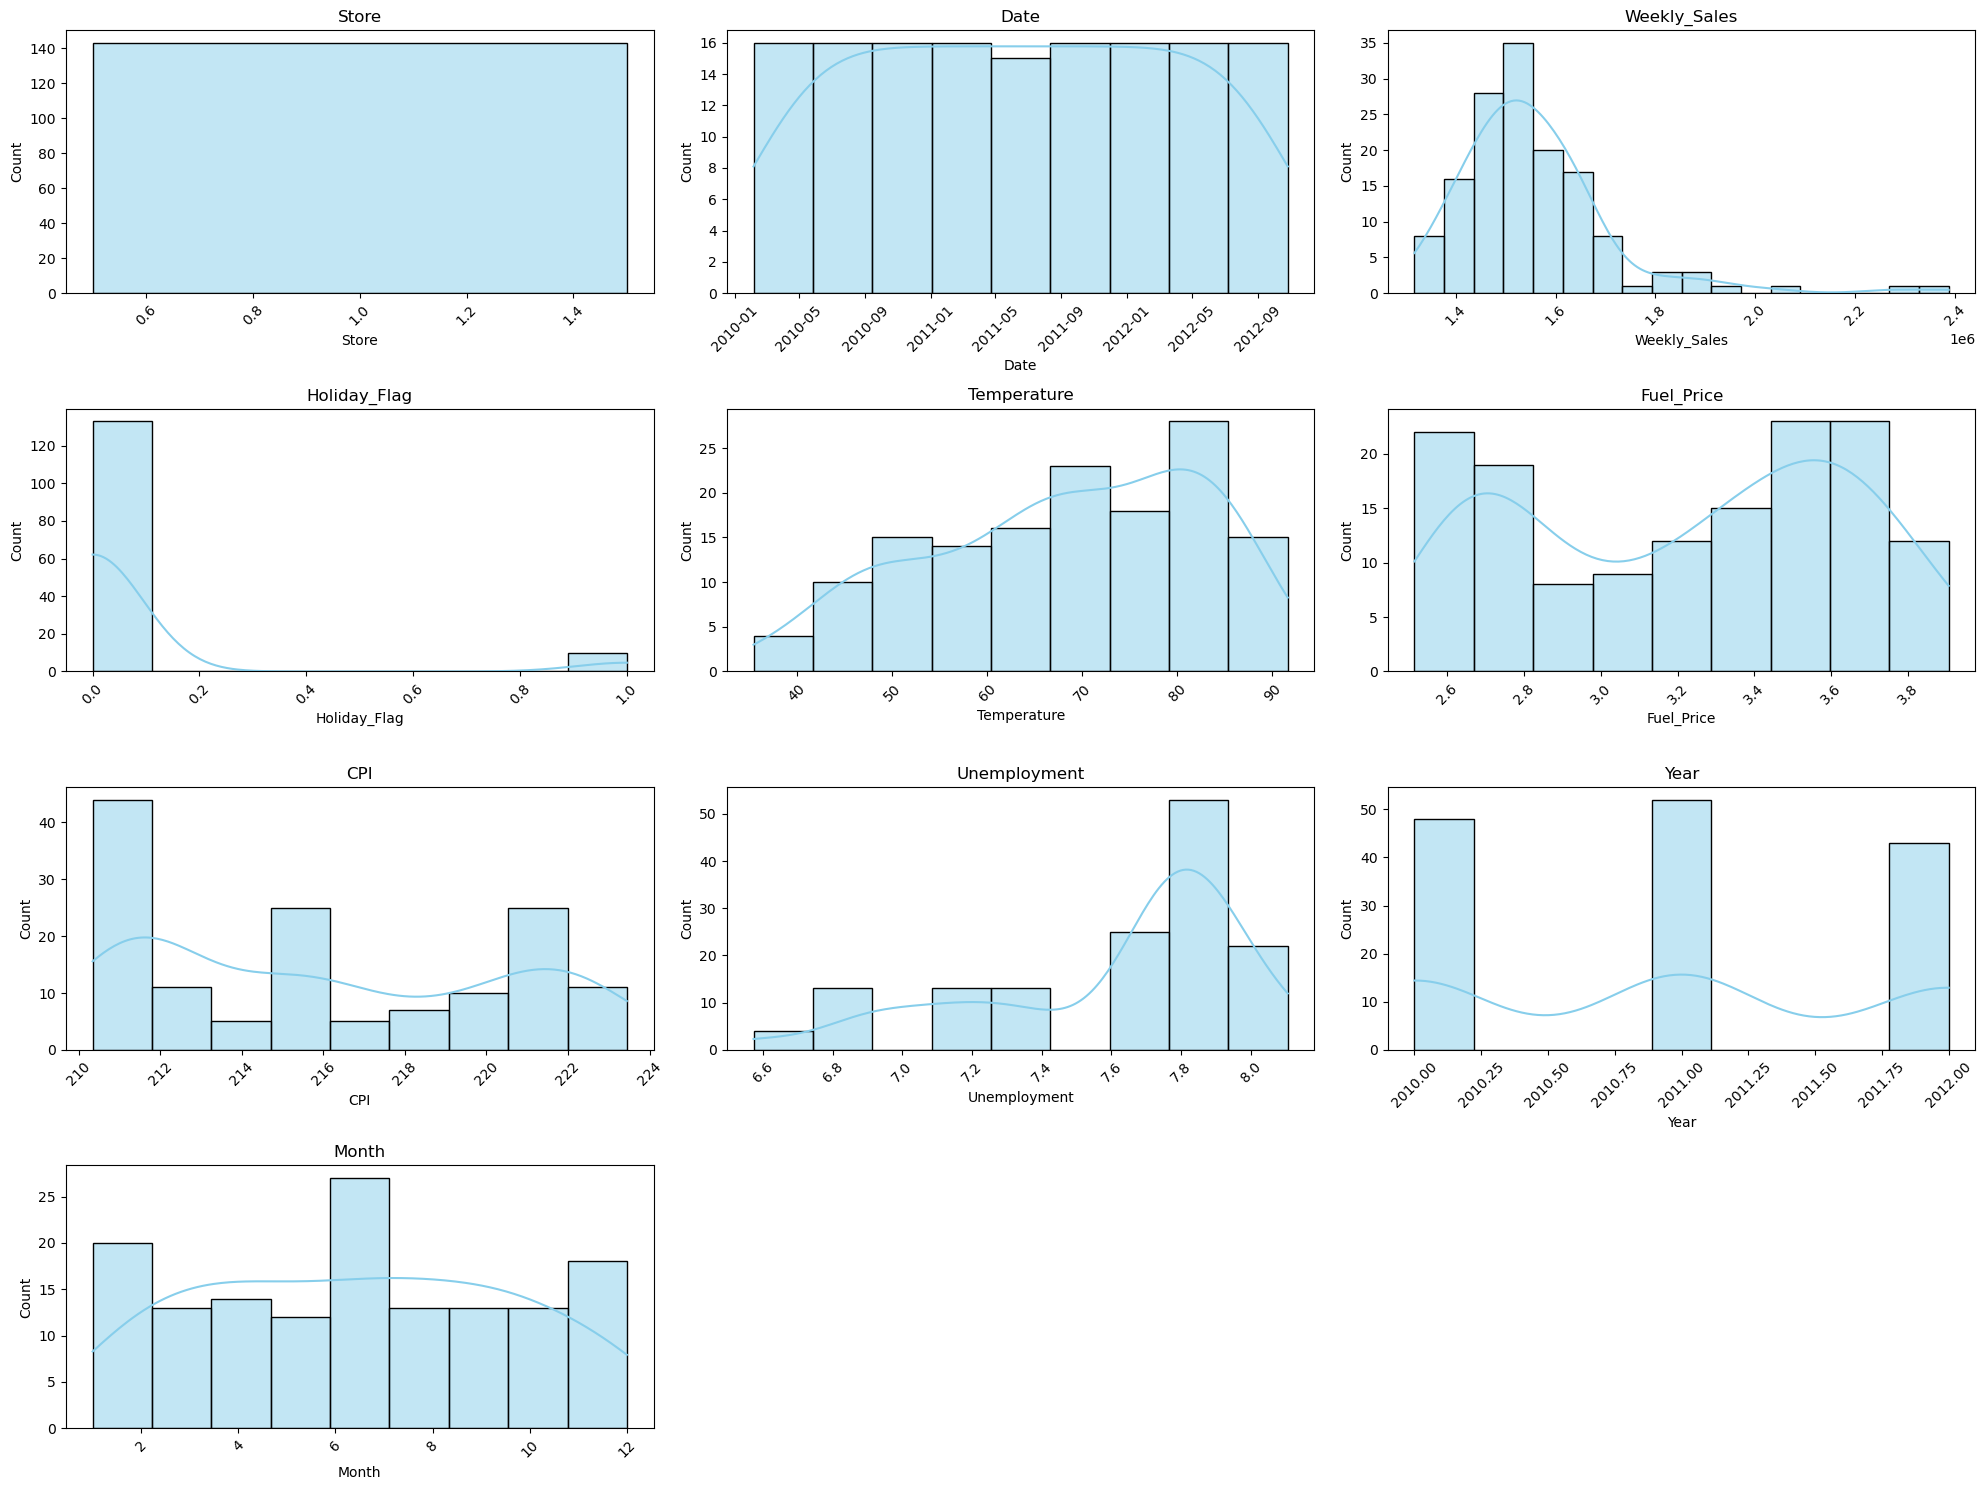

In [8]:
## Creating histograms of all the columns to capture the distribution of each variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(data[col], color='skyblue', kde = True)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout();

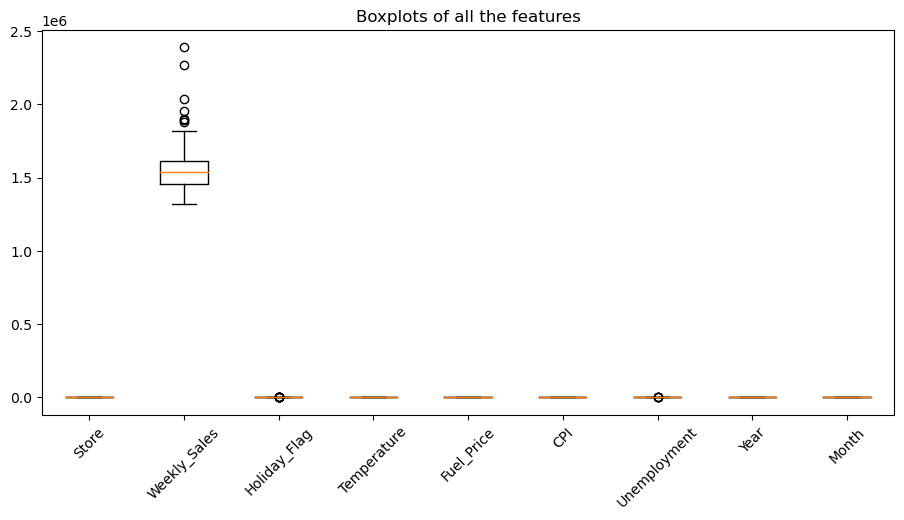

In [9]:
data_excluding_date = data.drop(columns=['Date'])

# Plot the boxplots for the new DataFrame
plt.figure(figsize=(11, 5))
plt.boxplot(data_excluding_date.values, labels=data_excluding_date.columns)
plt.title('Boxplots of all the features')
plt.xticks(rotation=45)
plt.show()

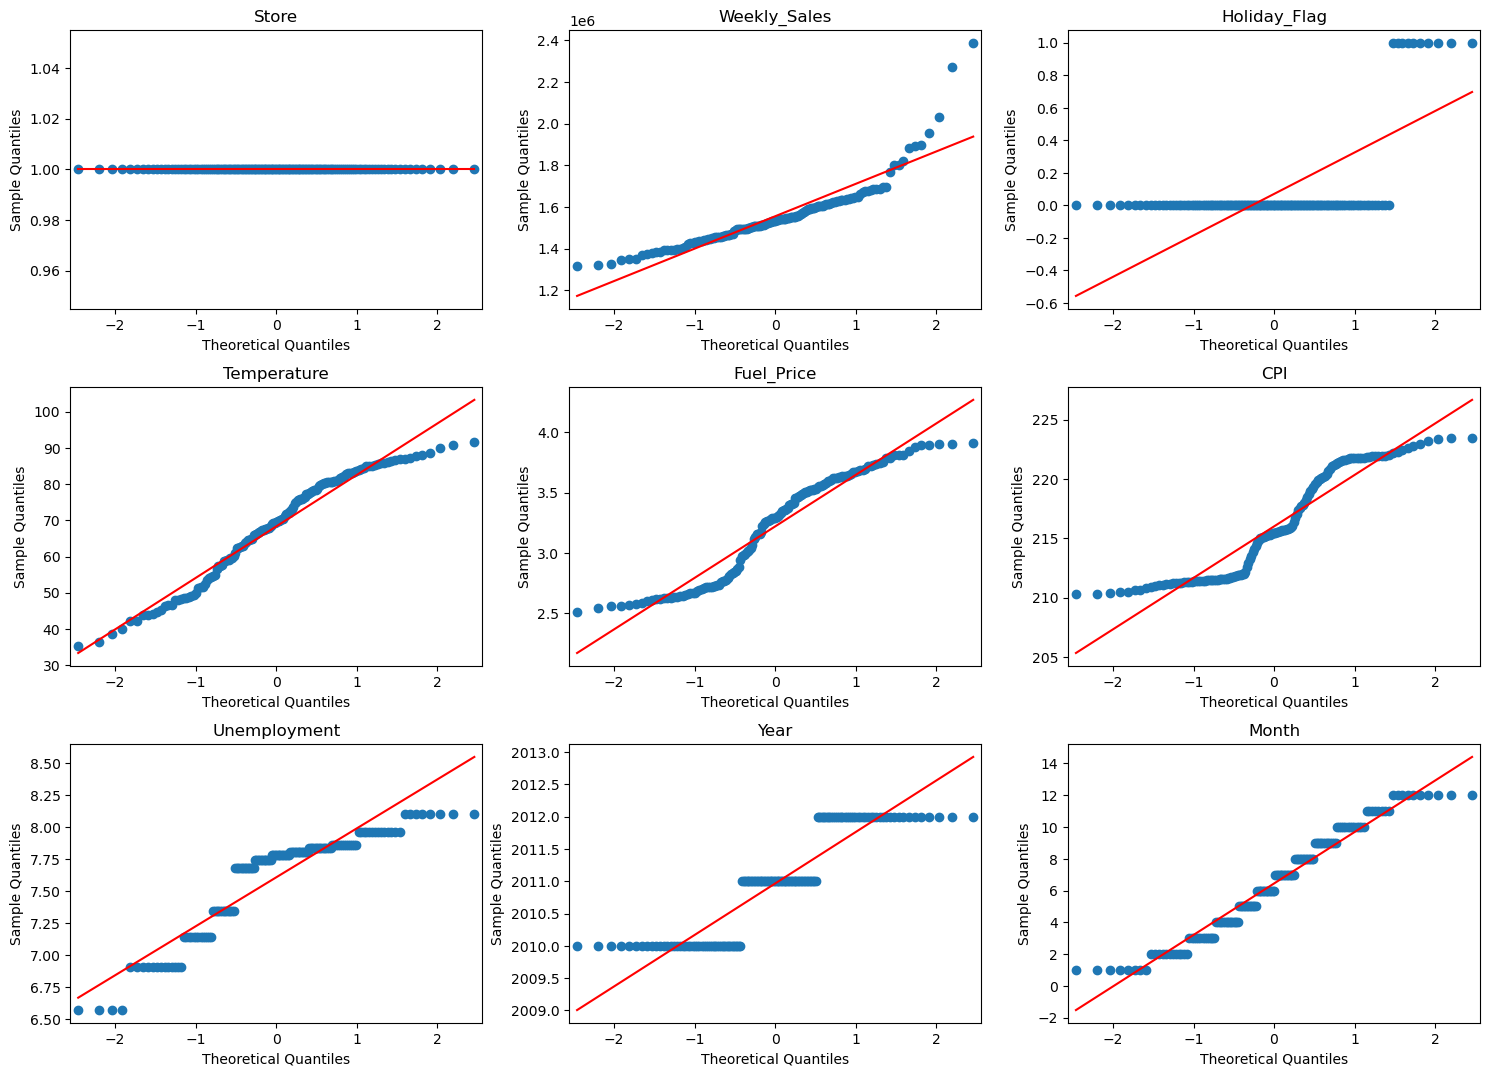

In [10]:
# Plot the Q-Q plots for the new DataFrame
plt.figure(figsize=(15, 14))
for i, col in enumerate(data_excluding_date.columns):
    plt.subplot(4, 3, i + 1)
    qqplot(data_excluding_date[col], line='s', ax=plt.gca())
    plt.title(col)
plt.tight_layout()
plt.show()

# Univariate Anlysis

In [11]:
df=pd.read_csv('unidata.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the entire DataFrame
#df

In [12]:
# Convert 'Date' column to datetime format, with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Date,Sales,Holiday_Flag,Year,Month
0,2010-02-05,1643690.90,0,2010,2
1,2010-02-12,1641957.44,1,2010,2
2,2010-02-19,1611968.17,0,2010,2
3,2010-02-26,1409727.59,0,2010,2
4,2010-03-05,1554806.68,0,2010,3


In [13]:
df.columns

Index(['Date', 'Sales', 'Holiday_Flag', 'Year', 'Month'], dtype='object')

In [14]:
df.set_index('Date', inplace=True)
print(df.head())

                 Sales  Holiday_Flag  Year  Month
Date                                             
2010-02-05  1643690.90             0  2010      2
2010-02-12  1641957.44             1  2010      2
2010-02-19  1611968.17             0  2010      2
2010-02-26  1409727.59             0  2010      2
2010-03-05  1554806.68             0  2010      3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         143 non-null    float64
 1   Holiday_Flag  143 non-null    int64  
 2   Year          143 non-null    int64  
 3   Month         143 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 5.6 KB


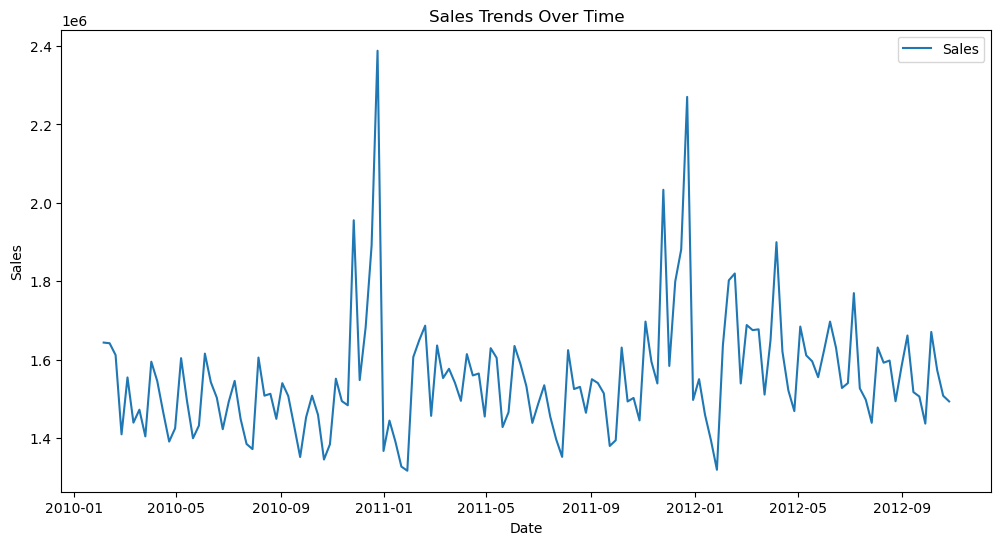

In [16]:
# Plotting Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

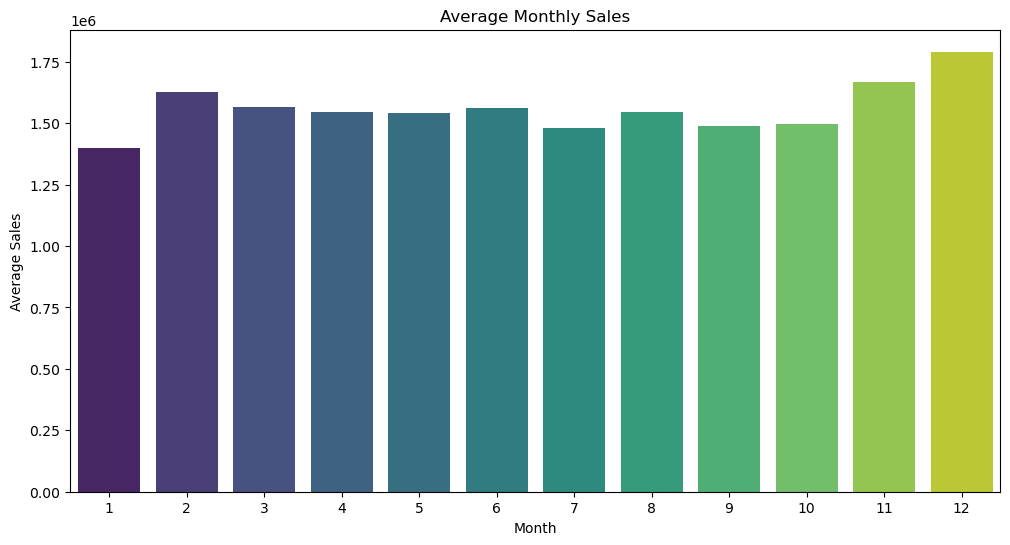

In [17]:
# Adding a 'Month' column for seasonal analysis
df['Month'] = df.index.month

# Plotting Seasonal Patterns
monthly_sales = df.groupby('Month')['Sales'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

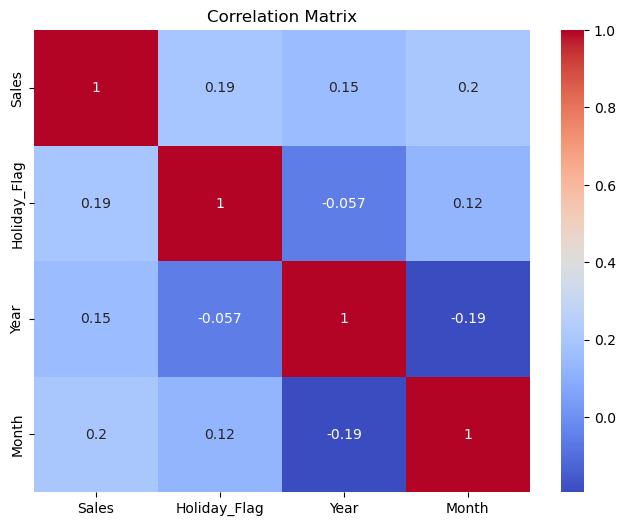

In [18]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

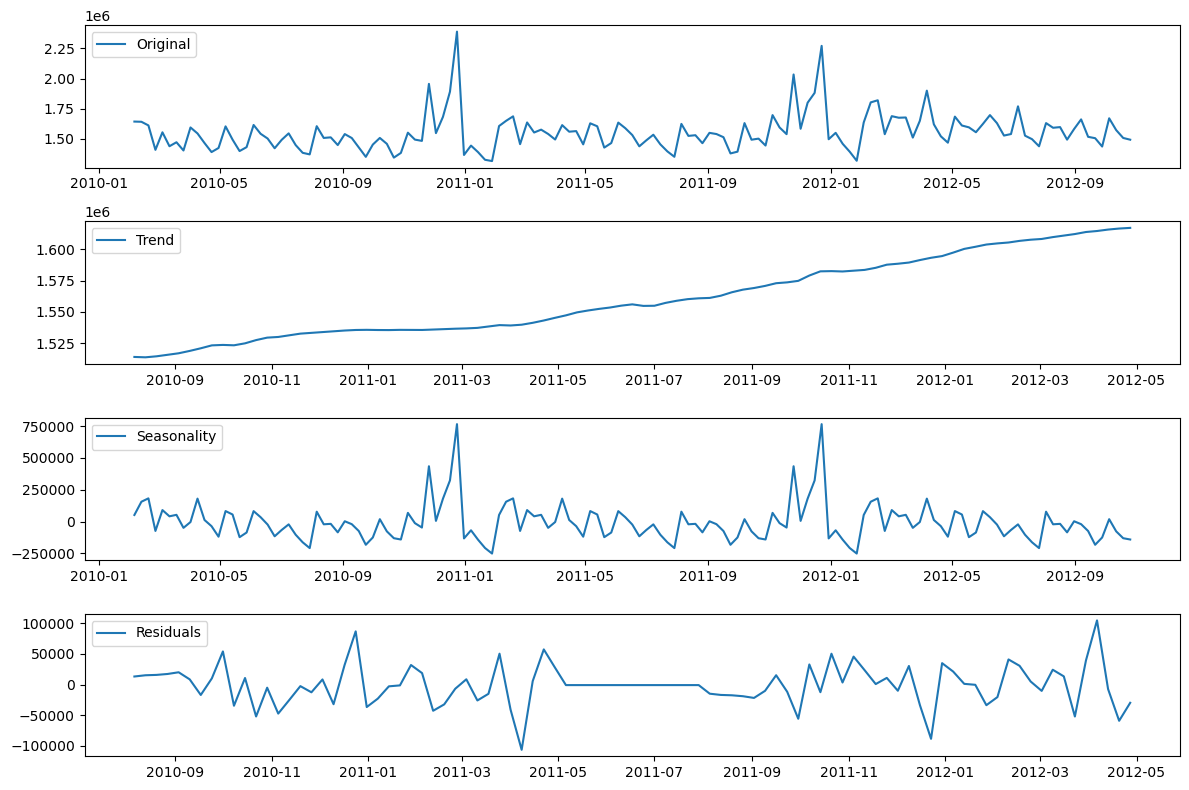

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series Decomposition
decomposition = seasonal_decompose(df['Sales'], model='additive', period=52)  # weekly data

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [20]:
df=df.reset_index()

# Model training

In [21]:
df= df.rename(columns={'Date': 'ds', 'Sales': 'y','Holiday_Flag':'holiday'})
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)
df.head()

,ds,y,holiday,Year,Month
0,2010-02-05,1643690.90,0,2010,2
1,2010-02-12,1641957.44,1,2010,2
2,2010-02-19,1611968.17,0,2010,2
3,2010-02-26,1409727.59,0,2010,2
4,2010-03-05,1554806.68,0,2010,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       143 non-null    datetime64[ns]
 1   y        143 non-null    float64       
 2   holiday  143 non-null    int64         
 3   Year     143 non-null    int64         
 4   Month    143 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 KB


In [23]:
split_ratio = 0.8
train_size = int(len(df) * split_ratio)
train = df[:train_size]
test = df[train_size:]

In [24]:
# print("Training set head:")
# print(train.head())
# print(train.tail())

# print("\nTesting set head:")
# print(test.head())
# print(test.tail())

23:10:01 - cmdstanpy - INFO - Chain [1] start processing
23:10:01 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat  holiday
252 2012-08-23  1.605480e+06      0.0
253 2012-08-24  1.572113e+06      0.0
254 2012-08-25  1.603384e+06      0.0
255 2012-08-26  1.676504e+06      0.0
256 2012-08-27  1.739814e+06      0.0


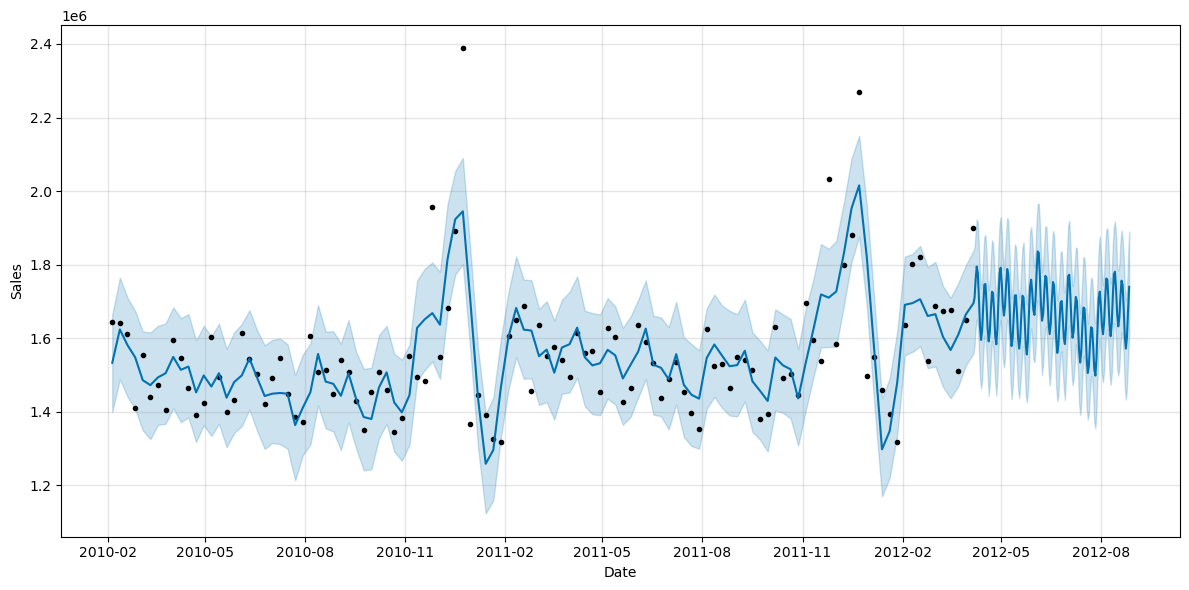

In [25]:

# Create and fit the model using the training set
model = Prophet()
model.add_seasonality(name='yearly', period=365.25, fourier_order=11)
model.add_seasonality(name='monthly', period=30, fourier_order=2)
model.add_seasonality(name='weekly', period=7, fourier_order=1)

model.add_regressor('holiday') 
model.fit(train)
holiday_in_test = test['holiday'] 
# Predict on the test set
future = model.make_future_dataframe(periods=len(df),freq='D', include_history=True)
future['holiday'] = holiday_in_test.reset_index(drop=True) 
future['holiday'] = future['holiday'].fillna(method='ffill')
forecast = model.predict(future)
print(forecast[['ds', 'yhat','holiday']].tail())
model.plot(forecast, figsize=(12, 6),  xlabel='Date', ylabel='Sales')
plt.show()

In [26]:
forecast_test = forecast[forecast['ds'].isin(test['ds'])]

comparison = forecast_test[['ds', 'yhat']].merge(test, on='ds', how='left')
comparison['error'] = comparison['yhat'] - comparison['y']

comparison.head()

,ds,yhat,y,holiday,Year,Month,error
0,2012-04-13,1.595646e+06,1621031.70,0,2012,4,-25385.244671
1,2012-04-20,1.591704e+06,1521577.87,0,2012,4,70125.692843
2,2012-04-27,1.583666e+06,1468928.37,0,2012,4,114738.070577
3,2012-05-04,1.662017e+06,1684519.99,0,2012,5,-22502.635682
4,2012-05-11,1.578948e+06,1611096.05,0,2012,5,-32147.965200


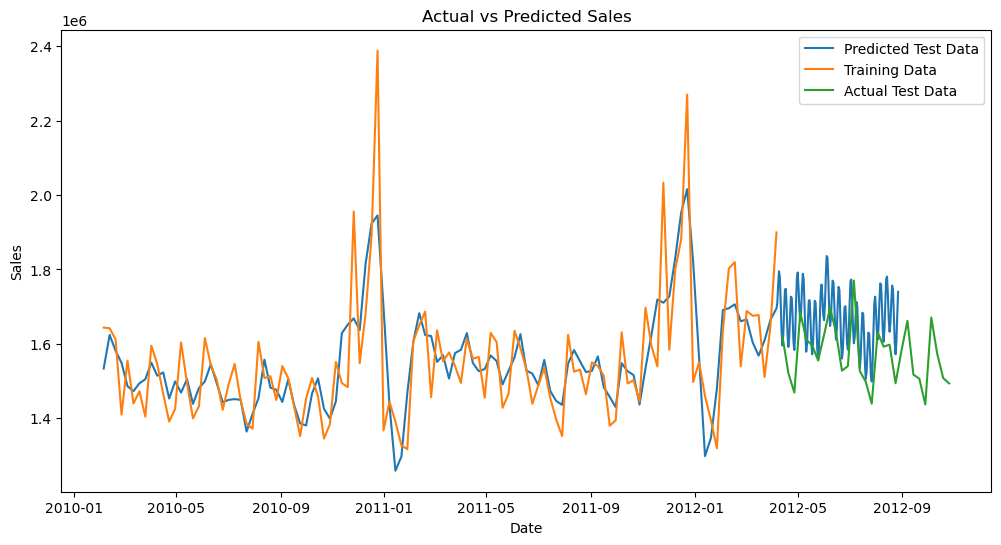

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Test Data')
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Test Data')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [919]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(comparison['y'], comparison['yhat'])
mse = mean_squared_error(comparison['y'], comparison['yhat'])
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(comparison['y'], comparison['yhat'])
mape = (abs((comparison['y'] - comparison['yhat']) / comparison['y'])).mean() * 100
accuracy = 100 - mape

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error: {rmse}")
print(f'Mean Absolute Percentage Error: {mape}%')
print(f'Accuracy: {accuracy}%')

Mean Absolute Error: 43119.76615044061
Mean Squared Error: 3398953395.9844594
Root Mean Squared Error: 58300.543702305724
Mean Absolute Percentage Error: 2.7211815372600174%
Accuracy: 97.27881846273998%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


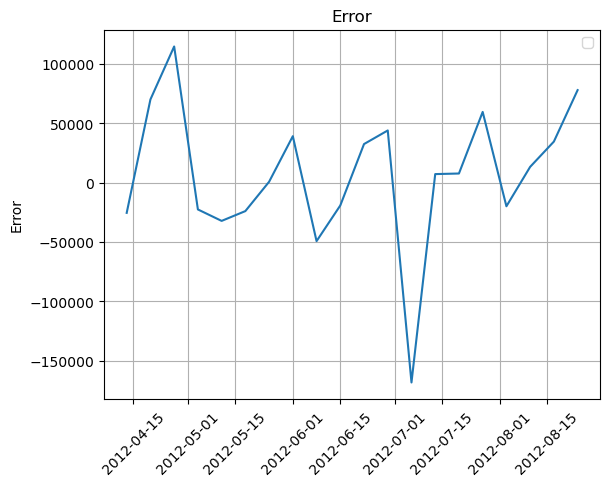

In [920]:

plt.plot(comparison['ds'], comparison['error'])
plt.ylabel('Error')
plt.title('Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


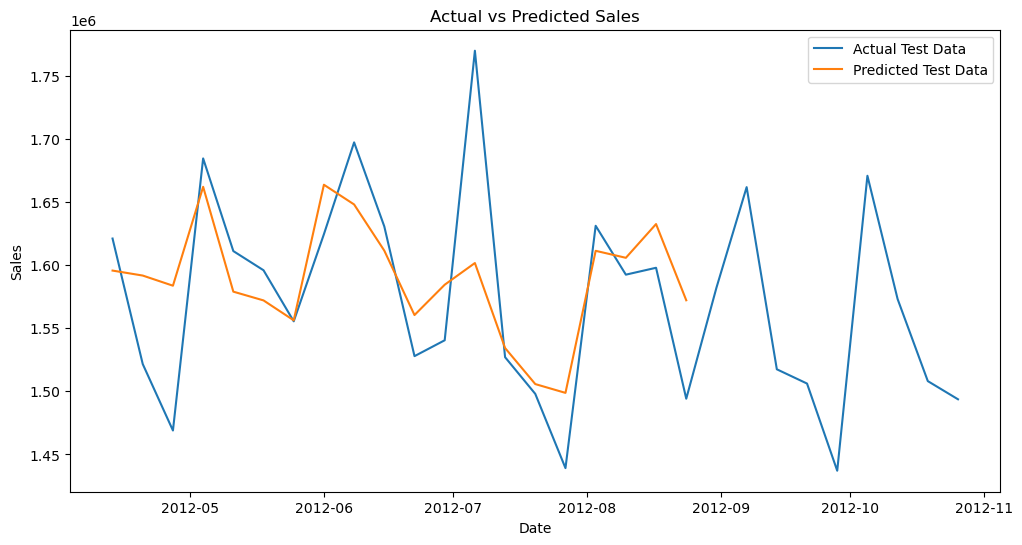

In [921]:
plt.figure(figsize=(12, 6))
#plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Test Data')
plt.plot(comparison['ds'], comparison['yhat'], label='Predicted Test Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()